# Get location of UTAM
Procesamos ligeramente el archivo de UTAM para usarlo en analisis geografico y spattial joins

In [1]:
import geopandas as geop
import seaborn as sns

In [2]:
sns.set(rc={"figure.figsize": (8, 4)})
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150

In [3]:
utam = geop.read_file('../data/01_raw/movilidad/ZONAS/utam.shx')
utam.columns = [c.lower() for c in utam.columns]
utam.head()

,muncodigo,munnombre,locnombre,usosnum,usoprenum,usoprecor,estrato1,estrato2,estrato3,estrato4,estrato5,estrato6,estratopre,hogares,utam,utamnombre,utamarea,geometry
0,11001.0,BOGOTA,TEUSAQUILLO,12345.0,1.0,RESIDENCIAL,NO,NO,SI,SI,NO,NO,4.0,14357.0,UTAM100,GALERIAS,2.372501e+06,"POLYGON ((-74.06463 4.64965, -74.06619 4.64146..."
1,11001.0,BOGOTA,KENNEDY,12345.0,2.0,COMERCIO Y SERVICIOS,SI,SI,NO,NO,NO,NO,2.0,3978.0,UTAM83,LAS MARGARITAS,1.470364e+06,"POLYGON ((-74.17077 4.62848, -74.17141 4.62811..."
2,11001.0,BOGOTA,TEUSAQUILLO,1234.0,1.0,RESIDENCIAL,NO,SI,SI,SI,NO,NO,4.0,10092.0,UTAM107,QUINTA PAREDES,1.737216e+06,"POLYGON ((-74.09245 4.63648, -74.09184 4.63569..."
3,11001.0,BOGOTA,TEUSAQUILLO,12345.0,1.0,RESIDENCIAL,NO,SI,SI,SI,NO,NO,4.0,10433.0,UTAM101,TEUSAQUILLO,2.353852e+06,"POLYGON ((-74.06707 4.63644, -74.06840 4.62882..."
4,11001.0,BOGOTA,SANTA FE,12345.0,2.0,COMERCIO Y SERVICIOS,SI,NO,SI,SI,NO,NO,1.0,2421.0,UTAM91,SAGRADO CORAZON,1.459944e+06,"POLYGON ((-74.05722 4.62403, -74.05719 4.62404..."


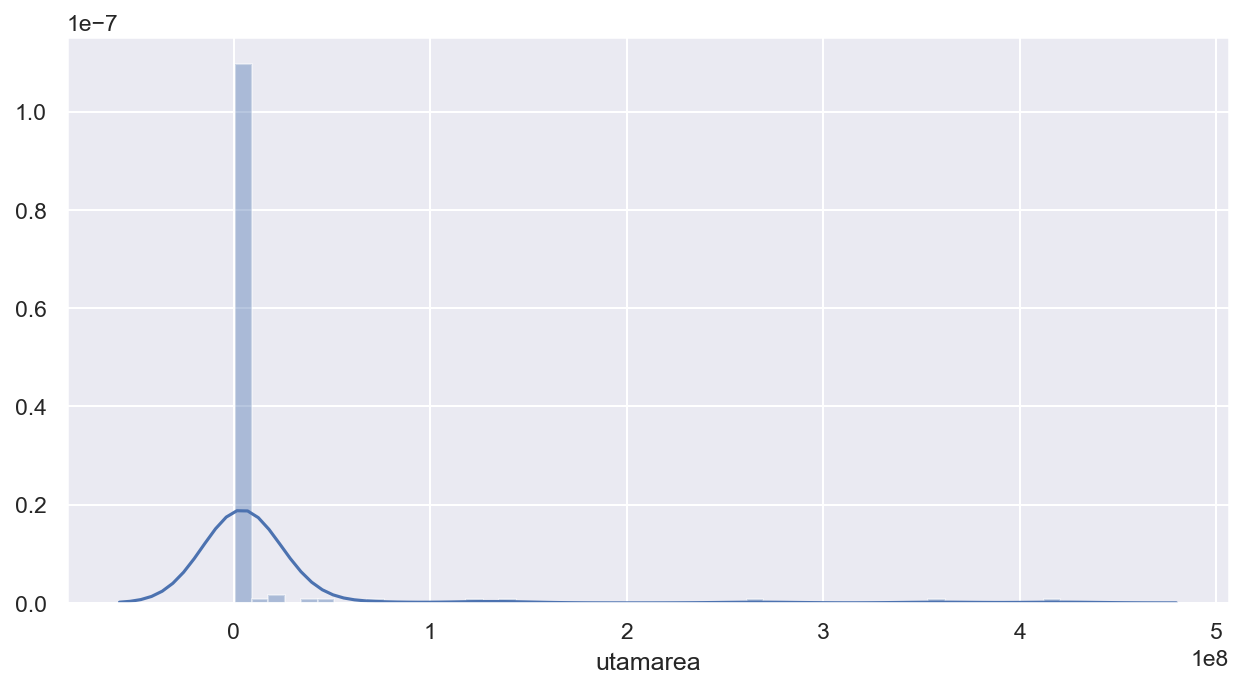

In [4]:
sns.distplot(utam.utamarea)

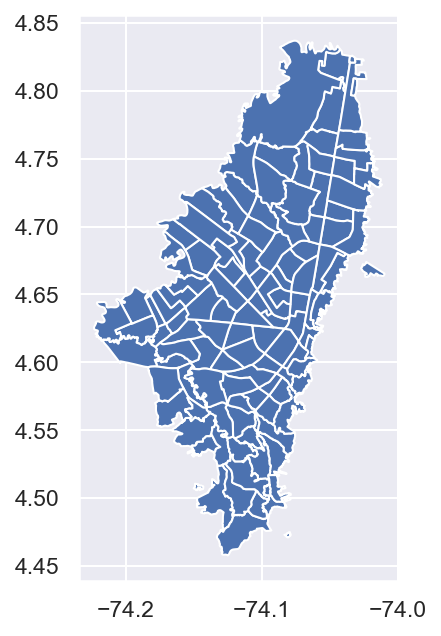

In [5]:
# only bogota and only metropolitan area
utam = utam.loc[lambda x:(x.munnombre=='BOGOTA') & (x.utamarea<1e8)]

utam.plot()

In [6]:
#centroides de cada UTAM
utam['centroide'] = utam.geometry.centroid

Saquemos los centroides para analisis rapido junto con los otros datasets

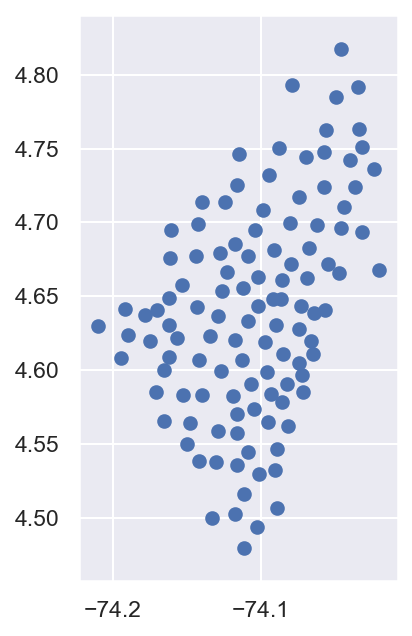

In [7]:
utam.assign(geometry=utam.centroide).plot()

In [8]:
utam.to_pickle('../data/02_processed/utam.pkl')

In [9]:
utam.head()

,muncodigo,munnombre,locnombre,usosnum,usoprenum,usoprecor,estrato1,estrato2,estrato3,estrato4,estrato5,estrato6,estratopre,hogares,utam,utamnombre,utamarea,geometry,centroide
0,11001.0,BOGOTA,TEUSAQUILLO,12345.0,1.0,RESIDENCIAL,NO,NO,SI,SI,NO,NO,4.0,14357.0,UTAM100,GALERIAS,2.372501e+06,"POLYGON ((-74.06463 4.64965, -74.06619 4.64146...",POINT (-74.07275 4.64354)
1,11001.0,BOGOTA,KENNEDY,12345.0,2.0,COMERCIO Y SERVICIOS,SI,SI,NO,NO,NO,NO,2.0,3978.0,UTAM83,LAS MARGARITAS,1.470364e+06,"POLYGON ((-74.17077 4.62848, -74.17141 4.62811...",POINT (-74.17835 4.63711)
2,11001.0,BOGOTA,TEUSAQUILLO,1234.0,1.0,RESIDENCIAL,NO,SI,SI,SI,NO,NO,4.0,10092.0,UTAM107,QUINTA PAREDES,1.737216e+06,"POLYGON ((-74.09245 4.63648, -74.09184 4.63569...",POINT (-74.08954 4.63072)
3,11001.0,BOGOTA,TEUSAQUILLO,12345.0,1.0,RESIDENCIAL,NO,SI,SI,SI,NO,NO,4.0,10433.0,UTAM101,TEUSAQUILLO,2.353852e+06,"POLYGON ((-74.06707 4.63644, -74.06840 4.62882...",POINT (-74.07392 4.62796)
4,11001.0,BOGOTA,SANTA FE,12345.0,2.0,COMERCIO Y SERVICIOS,SI,NO,SI,SI,NO,NO,1.0,2421.0,UTAM91,SAGRADO CORAZON,1.459944e+06,"POLYGON ((-74.05722 4.62403, -74.05719 4.62404...",POINT (-74.06594 4.61988)
